# **COVID19 confirmed cases in EU and Switzerland - updated Online**
#### **https://developers.arcgis.com/python/sample-notebooks/covid19-part3-predictive-analysis/**

### **Dataset from John Hopkins University's Center for Systems Science and Engineering (JHU CSSE):**
#### ** https://github.com/CSSEGISandData/COVID-19 **

### **The time-series consolidated data needed for all the analysis to be performed in this notebook fall into these two categories:**

  * **Type: Confirmed Cases, Deaths, and the Recovered;**
  * **Geography: Global, and the United States only.**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from arcgis.gis import GIS

In [2]:
# read time-series csv
global_ts_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
global_ts_df = pd.read_csv(global_ts_url, header=0, escapechar='\\')
global_ts_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,117524,117622,117739,117879,118004,118116,118251,118378,118516,118645
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12174,12231,12286,12328,12363,12409,12456,12497,12545,12581
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,22579,22631,22717,22885,23010,23108,23242,23331,23457,23549


In [3]:
global_ts_df.rename(columns={'Country/Region':'Country_Region','Province/State':'Province_State'},inplace=True)

# get the names of all Countries/Region
global_ts_df.Country_Region.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [4]:
EU_ts_df0 = global_ts_df[global_ts_df['Country_Region'].isin(['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Ireland','Italy','Latvia','Lithuania','Luxembourg','Malta','Netherlands','Poland','Portugal','Romania','Slovakia','Slovenia','Spain','Sweden','Switzerland']) == True]
EU_ts_df = EU_ts_df0.loc[EU_ts_df0['Province_State'].isnull()]
EU_ts_df.head(50)


,Province_State,Country_Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21
16,NaN,Austria,47.516200,14.550100,0,0,0,0,0,0,...,556012,558755,560972,562907,566008,568914,571616,574755,577007,578950
23,NaN,Belgium,50.833300,4.469936,0,0,0,0,0,0,...,897474,900996,902964,904673,908212,913057,917917,922487,925476,927229
32,NaN,Bulgaria,42.733900,25.485800,0,0,0,0,0,0,...,352259,352999,356859,356859,364419,367376,370179,371531,371993,375115
97,NaN,Croatia,45.100000,15.200000,0,0,0,0,0,0,...,278650,280026,280164,280899,282548,285765,288364,290899,292516,292938
99,NaN,Cyprus,35.126400,33.429900,0,0,0,0,0,0,...,47282,47713,48278,48837,49366,49988,50589,51035,51505,52033
100,NaN,Czechia,49.817500,15.473000,0,0,0,0,0,0,...,1549734,1551896,1553820,1555245,1560777,1567848,1573153,1577972,1580189,1581184
103,NaN,Denmark,56.263900,9.501800,0,0,0,0,0,0,...,232718,233318,233797,234317,234931,235648,236346,237101,237792,238306
113,NaN,Estonia,58.595300,25.013600,0,0,0,0,0,0,...,108937,109399,109781,110680,111664,112421,113098,113736,114174,114443
117,NaN,Finland,61.924110,25.748151,0,0,0,0,0,0,...,79094,79396,79737,80068,80416,80842,81261,81707,82053,82278
129,NaN,France,46.227600,2.213700,0,0,2,3,3,3,...,4707488,4788117,4799078,4807123,4807123,4903965,4903965,4903965,5021865,5030401


In [5]:
EU_ts_df.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/3/21', '4/4/21', '4/5/21', '4/6/21', '4/7/21', '4/8/21', '4/9/21',
       '4/10/21', '4/11/21', '4/12/21'],
      dtype='object', length=451)

In [6]:
date_list = EU_ts_df.columns.tolist()[4:]
date_list[0], date_list[-1]

('1/22/20', '4/12/21')

In [7]:
#EU_ts_df = EU_ts_df.groupby('Country_Region').sum()[date_list]
#EU_ts_df[EU_ts_df['4/1/21']>0]

In [8]:
# Ascend countries by the current number of confirmed
EU_ts_df[date_list[-1]].sort_values(ascending = False)

129    5030401
152    3779594
233    3370256
133    3024604
209    2586647
100    1581184
195    1357340
212    1008490
23      927229
237     857401
210     827765
144     725241
238     623126
16      578950
32      375115
227     371168
135     297086
97      292938
150     241330
103     238306
228     226786
169     226783
113     114443
163     107818
117      82278
170      63880
99       52033
177      29661
Name: 4/12/21, dtype: int64

## **Map the confirmed cases per country**

In [9]:
from arcgis.gis import GIS

#Create a map widget like you have done many times before
gis = GIS()
#map1 = gis.map()
#map1

map0 = gis.map("EU")
map0



MapView(layout=Layout(height='400px', width='100%'))

In [10]:
map0.basemap = "dark-gray"
map0.zoom = 4
map0.center = {  'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
                 'x': 612212.84,
                 'y': 6150499.87} # UTM coordinates

In [11]:
### This runs forever and is very slow

#for Confirmed in date_list:
#    map0.clear_graphics()
#    map0.remove_layers()
#    map0.legend=False
    
#    df = EU_ts_df[['Country_Region', "Lat", "Long", Confirmed]]
    #df.rename(columns={d: 'Confirmed'}, inplace=True)

    # import the data frame as a feature collection
#    fc = gis.content.import_data(df,
#                                 {"Address":"Country_Region"})
#    fset=fc.query()
#    fset.sdf.spatial.plot(map_widget=map0,
#                          renderer_type="c",
#                          method="esriClassifyNaturalBreaks",
#                          class_count=13,
#                          col="Confirmed",
#                          min_value=13,
#                          cmap="coolwarm",
#                          alpha=0.7)
                          
#    map0.legend=True
#    time.sleep(3)

In [14]:
from IPython.display import clear_output
import matplotlib.pyplot as plot

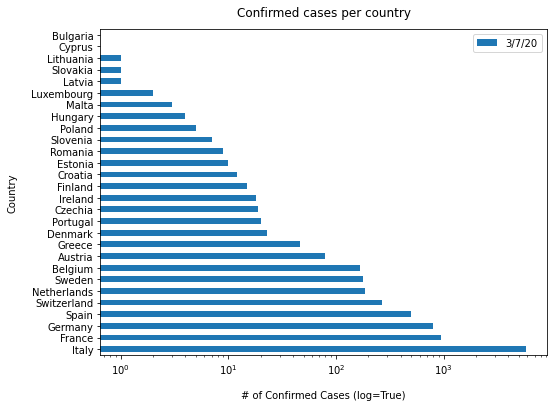

In [ ]:
"""Chart all countries; ascending with highest confirmed cases"""
time.sleep(3)
for d in date_list:
    clear_output(wait=True)
    top_20_per_d = EU_ts_df.groupby('Country_Region')[['Country_Region', d]].sum().sort_values(by=d, ascending=False)
    top_20_per_d.plot(kind='barh', log=True, figsize=(8,6))
    plt.ylabel("Country", labelpad=14)
    plt.xlabel("# of Confirmed Cases (log=True)", labelpad=14)
    plt.title("Confirmed cases per country", y=1.02)
    plt.show()
    time.sleep(1)

